In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [2]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [3]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [4]:
dataset=pd.DataFrame(df)

In [5]:
dataset.head(5)

,x1,x2,y
0,-0.429567,0.760785,0
1,0.681065,-0.030317,0
2,-1.016656,0.450062,0
3,-1.067545,0.416127,0
4,-0.274277,-0.057400,1


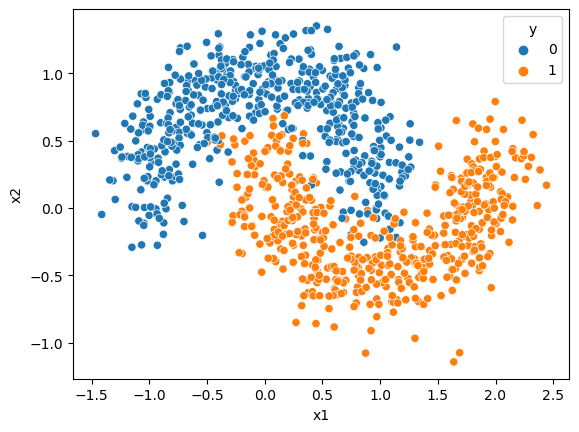

In [6]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [7]:
x_a=dataset.iloc[:,:-1]
y_a=dataset["y"]

In [8]:
x_a

,x1,x2
0,-0.429567,0.760785
1,0.681065,-0.030317
2,-1.016656,0.450062
3,-1.067545,0.416127
4,-0.274277,-0.057400
...,...,...
995,0.957699,0.180966
996,-1.009300,0.573022
997,-0.775454,0.987250
998,0.154326,-0.207947


In [9]:
y_a

0      0
1      0
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: y, Length: 1000, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(87.25, 86.0)

In [18]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [19]:
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(97.0, 97.0)

In [20]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
dtc.score(x_train,y_train)*100,dtc.score(x_test,y_test)*100

(100.0, 96.0)

In [22]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
knn.score(x_train,y_train)*100,knn.score(x_test,y_test)*100

(97.75, 97.0)

In [24]:
from sklearn.ensemble import VotingClassifier

In [25]:
parameter=[("lr1",LogisticRegression()),("sv1",SVC()),("dtc1",DecisionTreeClassifier()),("knn1",KNeighborsClassifier())]

In [26]:
vc=VotingClassifier(parameter)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr1', LogisticRegression()), ('sv1', SVC()),
                             ('dtc1', DecisionTreeClassifier()),
                             ('knn1', KNeighborsClassifier())])

In [27]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.875, 96.5)

In [28]:
x_test[5:10]

,x1,x2
678,0.716651,0.253181
626,1.470153,-0.201501
513,-0.221336,-0.332272
859,0.147271,0.543588
136,0.369717,0.070346


In [29]:
y_test[5:10]

678    0
626    1
513    1
859    1
136    1
Name: y, dtype: int64

In [30]:
data=pd.DataFrame([[0.140015,0.380294]],columns=x_a.columns)
vc.predict(data)

array([1])

In [31]:
data1=pd.DataFrame([[0.651922,0.195090]],columns=x_a.columns)
vc.predict(data1)

array([0])

In [32]:
predict={"lr":lr.predict(x_test),"sv":sv.predict(x_test),"dtc":dtc.predict(x_test),"knn":knn.predict(x_test),"vc":vc.predict(x_test)}

In [33]:
data=pd.DataFrame(predict)

In [34]:
pd.set_option('display.max_rows', 500)

In [35]:
data

,lr,sv,dtc,knn,vc
0,0,0,0,0,0
1,1,1,1,1,1
2,0,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,1,0,0,0,0
6,1,1,1,1,1
7,1,1,1,1,1
8,0,0,0,1,0
9,1,1,1,1,1


# In above table we can see the outcomes of each classification models along side with ensemble methods